## <center>Анализ SQL запросов</center>

### Импорт:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
models = pd.read_csv('/datasets/query_1.csv')
flights = pd.read_csv('/datasets/query_3.csv')

### Изучим данные:

In [3]:
models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
___

In [4]:
flights.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

### Проверим типы данных на корректность:

In [5]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


##### Данные полные, с корректными типами. Проверим на дубликаты таблицу flights:

In [7]:
flights.duplicated().sum()

0

### Топ 10 городов по кол-ву рейсов:

In [8]:
flights_top10 = flights.sort_values(by='average_flights', ascending=False).round().head(10)
flights_top10

,city,average_flights
43,Москва,130.0
70,Санкт-Петербург,31.0
54,Новосибирск,17.0
33,Красноярск,12.0
20,Екатеринбург,11.0
67,Ростов-на-Дону,10.0
63,Пермь,10.0
10,Брянск,10.0
74,Сочи,10.0
84,Ульяновск,10.0


### Построим граффики:

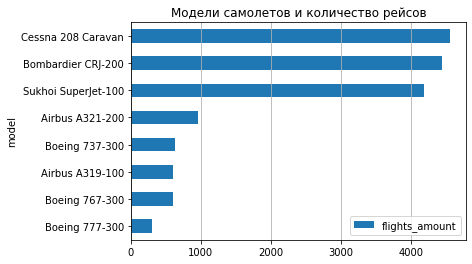

In [9]:
fig, ax = plt.subplots()
models.sort_values(by='flights_amount').plot(x='model', y='flights_amount', ax=ax, kind='barh', title='Модели самолетов и количество рейсов')
ax.grid(axis='x')

##### Более 4000 рейсов приходятся на одномоторник Cessna 208, с вместимостью в 9 пассажиров, Bombardier CRJ-200 и Sukhoi SuperJet-100 с максимальной дальностью полета в 3000 - 4000 м.  То есть, лидируют маленькие самолеты с короткой максимальной дистаницей. Массовые пассажирские самолеты летают в 4 раза меньше.

___

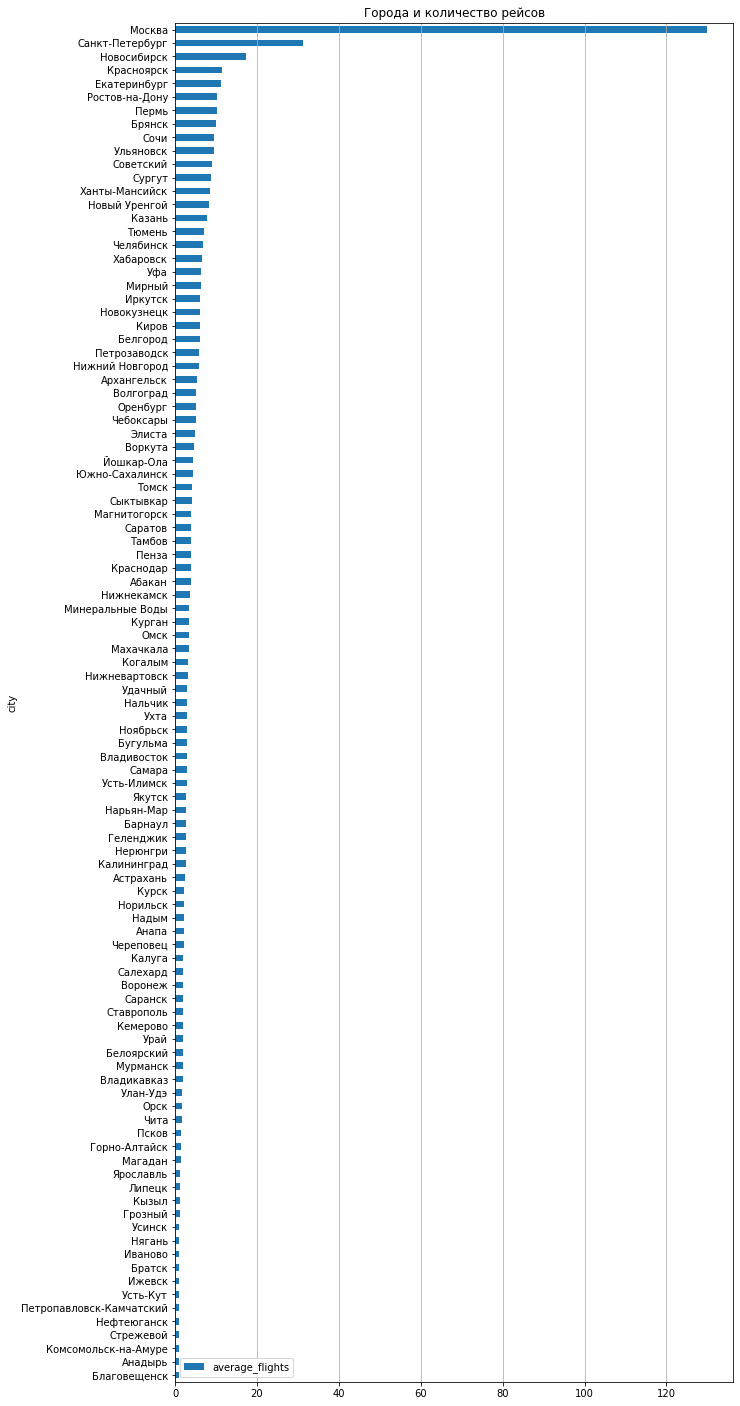

In [10]:
fig, ax = plt.subplots()
flights.sort_values(by='average_flights').plot(x='city', y='average_flights', ax = ax, kind='barh', figsize=(10,25),title='Города и количество рейсов')
ax.grid(axis='x')

##### Москва принимает значительно больше рейсов в день, чем остальные города. Москва - крупнейший транспортный узел страны. 

___

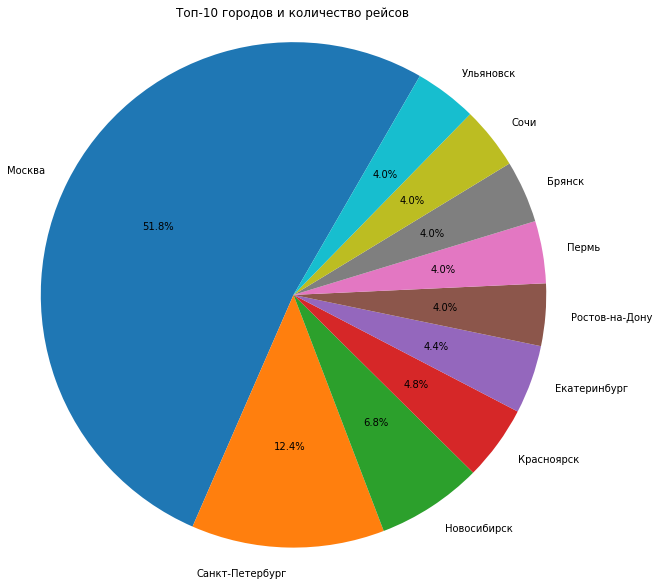

In [20]:
labels = list(flights_top10['city'])
sizes = list(flights_top10['average_flights'])

plt.figure(figsize=(10,10))
plt.title('Топ-10 городов и количество рейсов')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)
plt.axis('equal')
plt.show()

##### Также можно отметить Санкт-Петербург и Новосибирск. Остальные города имеют схожий процент прибывших рейсов.